In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


%matplotlib inline

filename = "modifygamingdata.csv"

df = pd.read_csv(filename)

# Getting a feel for our data 

### Below we...
### check the first 5 entries 
### grab column names to preprocess/manipulate later
### describe the numerical data with statistical means
### Plot the original Heatmap with correlation data to see any trends within the raw data 
### Make histogram of Global Sales to find out how many copies are the most elite samples selling

In [2]:
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Rockstar North,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
1,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
2,31,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,Rockstar North,9.6,16.15,8.41,5.49,0.47,1.78,2002.0
3,41,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,Infinity Ward,8.7,14.82,9.07,4.29,0.13,1.33,2011.0
4,42,Call of Duty: Black Ops,Shooter,M,X360,Activision,Treyarch,8.8,14.74,9.76,3.73,0.11,1.14,2010.0


In [3]:
df.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Critic_Score', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year'],
      dtype='object')

In [4]:
df.describe()

,Rank,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,3983.782308,7.590538,1.495185,0.694192,0.505731,0.121308,0.173823,2008.553846
std,3274.281962,1.176853,2.110743,1.051784,0.898886,0.192167,0.306553,4.758626
min,20.000000,3.200000,0.030000,0.010000,0.000000,0.000000,0.000000,1995.000000
25%,1305.250000,6.900000,0.370000,0.140000,0.050000,0.020000,0.020000,2006.000000
50%,3238.000000,7.800000,0.730000,0.300000,0.190000,0.050000,0.060000,2009.000000
75%,5865.500000,8.400000,1.655000,0.750000,0.530000,0.140000,0.190000,2011.000000
max,17048.000000,10.000000,20.320000,9.760000,9.850000,2.170000,3.120000,2018.000000


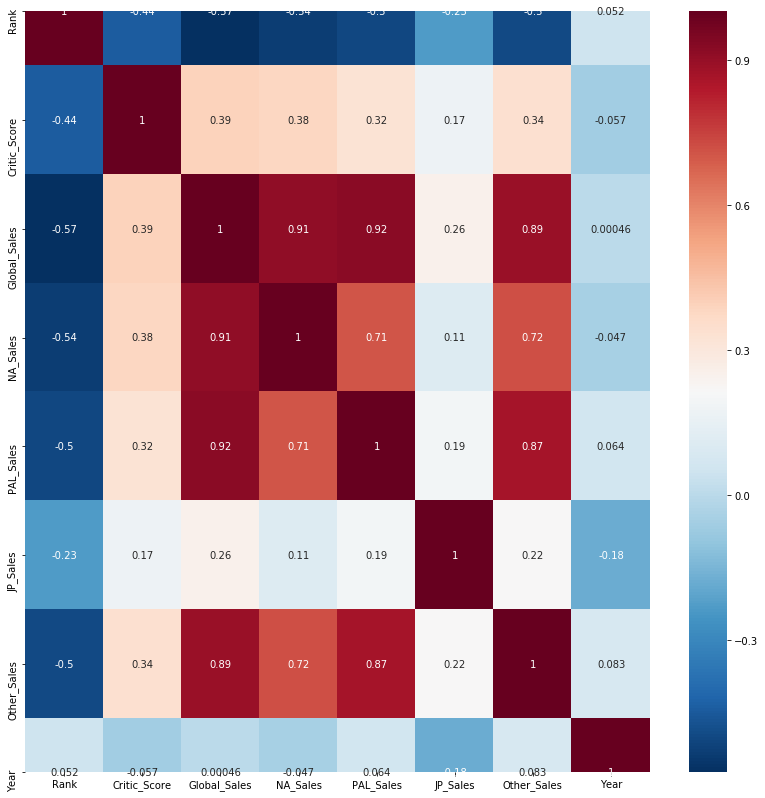

In [5]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True,cmap='RdBu_r');

### Global sales are tied heavily to North American and PAL sales 
### Rank has little to negative effect as well as critic scores

### Examining Global Sales in general should be more effective

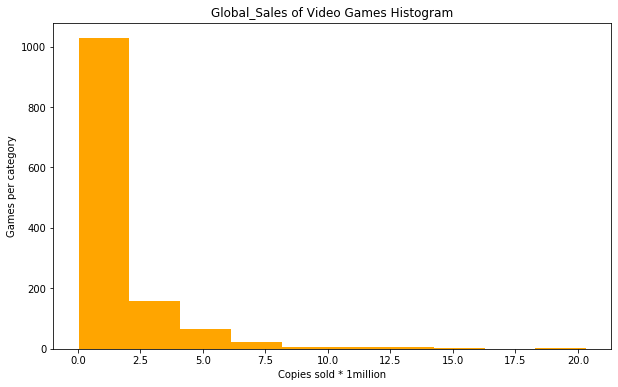

In [6]:
plt.figure(figsize=(10,6))
plt.hist(df["Global_Sales"] ,color='orange')
plt.title('Global_Sales of Video Games Histogram')
plt.xlabel('Copies sold * 1million')
plt.ylabel('Games per category');

In [7]:
sales = df[df["Global_Sales" ] > 3.5]
print(df.shape[0],len(sales))

1300 158


## Ideally want number of Global_sales to a non insignificant portion of our total sales

### 158/1300 $\approx$ 11.5%

### 3.5 ended up being the best choice without being too little data

In [8]:
df[df["Global_Sales" ] > 3.5]

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Rockstar North,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
1,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
2,31,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,Rockstar North,9.6,16.15,8.41,5.49,0.47,1.78,2002.0
3,41,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,Infinity Ward,8.7,14.82,9.07,4.29,0.13,1.33,2011.0
4,42,Call of Duty: Black Ops,Shooter,M,X360,Activision,Treyarch,8.8,14.74,9.76,3.73,0.11,1.14,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,445,Resident Evil 5,Action,M,X360,Capcom,Capcom,8.6,3.53,2.13,0.93,0.12,0.34,2009.0
154,447,NBA 2K17,Sports,E,PS4,2K Sports,Visual Concepts,9.0,3.52,2.28,0.59,0.03,0.63,2016.0
155,448,FIFA Soccer 11,Sports,E,X360,EA Sports,EA Canada,8.7,3.52,0.71,2.39,0.02,0.40,2010.0
156,449,Spyro 2: Ripto's Rage!,Platform,E,PS,Sony Computer Entertainment,Insomniac Games,8.7,3.52,2.14,1.21,0.01,0.17,1999.0


In [9]:
## add back to df
df['Hit Game'] = df['Global_Sales'].map(lambda x: x > 3.5)

In [10]:
df = df.replace(True, "1")

In [11]:
df = df.replace(False, "0")

In [12]:
df

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Hit Game
0,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Rockstar North,9.4,20.32,6.37,9.85,0.99,3.12,2013.0,1
1,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.7,19.39,6.06,9.71,0.6,3.02,2014.0,1
2,31,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,Rockstar North,9.6,16.15,8.41,5.49,0.47,1.78,2002.0,1
3,41,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,Infinity Ward,8.7,14.82,9.07,4.29,0.13,1.33,2011.0,1
4,42,Call of Duty: Black Ops,Shooter,M,X360,Activision,Treyarch,8.8,14.74,9.76,3.73,0.11,1.14,2010.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,14665,Warriors Orochi 2,Action,T,X360,KOEI,Omega Force,4.6,0.06,0.04,0,0.01,0,2008.0,0
1296,14973,Virtua Striker 2002,Sports,E,GC,Sega,Amusement Vision,6.6,0.05,0.01,0,0.03,0,2002.0,0
1297,15290,GrimGrimoire,Strategy,E10,PS2,NIS America,Vanillaware,7.7,0.05,0.01,0.01,0.03,0,2007.0,0
1298,15835,Metal Gear Solid: Digital Graphic Novel,Misc,M,PSP,Konami,Kojima Productions,7.6,0.04,0.02,0,0.02,0,2006.0,0


In [13]:
enc = OneHotEncoder(handle_unknown='ignore')

In [14]:
## Getting k - 1 categorial columns from each category

dummy_df = pd.get_dummies(df, columns = ['Rank','Genre', 'ESRB_Rating', 'Platform', 'Publisher','Developer', 'Critic_Score'])
dummy_df = dummy_df.drop(["Global_Sales","Name","PAL_Sales","JP_Sales","Other_Sales","NA_Sales", "Hit Game"], axis =1)

## Make sure it worked, look at all them columns
dummy_df.head()

,Year,Rank_20,Rank_21,Rank_31,Rank_41,Rank_42,Rank_46,Rank_50,Rank_51,Rank_52,...,Critic_Score_9.0,Critic_Score_9.1,Critic_Score_9.2,Critic_Score_9.3,Critic_Score_9.4,Critic_Score_9.5,Critic_Score_9.6,Critic_Score_9.7,Critic_Score_9.8,Critic_Score_10.0
0,2013.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2014.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2002.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2011.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Lets try linear regression to see how well it fits

In [15]:
target = df["Hit Game"].values
features = dummy_df[list(dummy_df.columns)].values

regression = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)

## Standard scaler is much more influence by large or very small outliers
#scaler = StandardScaler()

# Min max scaler puts all values in range [0,1] reducing outlier influence
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regression.fit(X_train, y_train)

Accuracy = regression.score(X_train, y_train)
print (("Accuracy for training set: "), Accuracy*100, "%")

accuracy = regression.score(X_test, y_test)
print (("Accuracy for testing set"), accuracy*100, "%" )

Accuracy for training set:  100.0 %
Accuracy for testing set 38.19445467570182 %


## That was bad... lets not talk about that 

## Trying Logistic regression 

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logreg = LogisticRegression()

In [18]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
X=df[['Name', 'Genre', 'ESRB_Rating', 'Platform', 'Developer', 'Global_Sales']]
y=df['Hit Game']

In [20]:
X = pd.get_dummies(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
logreg.fit(X_train,y_train) ## Maybe tune these later 

C:\Users\mwalk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
logreg.predict(X_test[0:1000])

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0

In [24]:
predictions = logreg.predict(X_test)

In [25]:
predictions.shape

(260,)

## Test model accuracy

In [26]:
score = logreg.score(X_test,y_test)
print(score)

0.8923076923076924


In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
confuse = confusion_matrix(y_test,predictions)

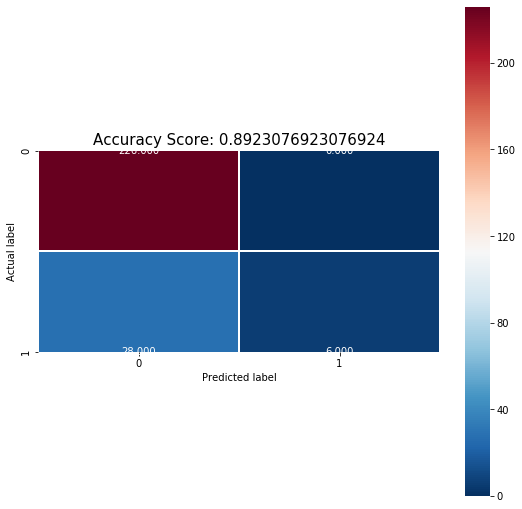

In [29]:
plt.figure(figsize=(9,9))
sns.heatmap(confuse, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdBu_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Random Forests

In [30]:
X=df[['Name', 'Genre', 'ESRB_Rating', 'Platform', 'Developer', 'Global_Sales']]
y=df['Hit Game']
X = pd.get_dummies(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [33]:
model = clf.fit(X_train,y_train)

In [34]:
y_pred=clf.predict(X_test)

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9076923076923077


In [36]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [37]:
feature_importances

,importance
Developer_Naughty Dog,0.027058
Platform_PS2,0.019476
Developer_Infinity Ward,0.017998
Developer_Bethesda Game Studios,0.016983
Global_Sales_3.52,0.012585
...,...
Developer_Wolfteam / Namco Tales Studio,0.000000
Name_Mass Effect 2,0.000000
Name_Mass Effect,0.000000
Name_Tony Hawk's Pro Skater 4,0.000000


In [38]:
feature_importances = feature_importances[feature_importances["importance"] > 0.005]

In [39]:
feature_importances

,importance
Developer_Naughty Dog,0.027058
Platform_PS2,0.019476
Developer_Infinity Ward,0.017998
Developer_Bethesda Game Studios,0.016983
Global_Sales_3.52,0.012585
Global_Sales_4.37,0.011419
Platform_PS4,0.011349
Name_Assassin's Creed: Revelations,0.009920
Genre_Sports,0.009299
Developer_Rocksteady Studios,0.008920


# Decision Trees

In [40]:
X=df[['Name', 'Genre', 'ESRB_Rating', 'Platform', 'Developer', 'Global_Sales']]
y=df['Hit Game']
X = pd.get_dummies(X)
X_cols = list(X.columns)

## Using Gini

[Text(308.0218531468532, 215.024, 'X[1317] <= 0.5\ngini = 0.219\nsamples = 910\nvalue = [796, 114]'),
 Text(303.3393356643357, 210.192, 'X[1254] <= 0.5\ngini = 0.21\nsamples = 904\nvalue = [796, 108]'),
 Text(281.2437062937063, 205.35999999999999, 'X[1114] <= 0.5\ngini = 0.199\nsamples = 894\nvalue = [794, 100]'),
 Text(260.465034965035, 200.528, 'X[1067] <= 0.5\ngini = 0.189\nsamples = 887\nvalue = [793, 94]'),
 Text(232.95524475524476, 195.696, 'X[1385] <= 0.5\ngini = 0.156\nsamples = 810\nvalue = [741, 69]'),
 Text(228.27272727272728, 190.864, 'X[1069] <= 0.5\ngini = 0.148\nsamples = 806\nvalue = [741, 65]'),
 Text(206.03076923076924, 186.032, 'X[1466] <= 0.5\ngini = 0.128\nsamples = 773\nvalue = [720, 53]'),
 Text(194.32447552447553, 181.2, 'X[1256] <= 0.5\ngini = 0.114\nsamples = 757\nvalue = [711, 46]'),
 Text(184.95944055944057, 176.368, 'X[1836] <= 0.5\ngini = 0.108\nsamples = 753\nvalue = [710, 43]'),
 Text(180.27692307692308, 171.536, 'X[1837] <= 0.5\ngini = 0.103\nsamples = 

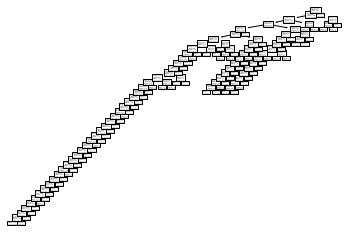

In [41]:
clf_g = tree.DecisionTreeClassifier(criterion="gini")
clf_g = clf_g.fit(X_train, y_train)
y_pred = clf_g.predict(X_test)
tree.plot_tree(clf_g)

## Using Entropy

[Text(296.4375, 214.6523076923077, 'X[1317] <= 0.5\nentropy = 0.544\nsamples = 910\nvalue = [796, 114]'),
 Text(291.36477272727274, 209.07692307692307, 'X[1067] <= 0.5\nentropy = 0.528\nsamples = 904\nvalue = [796, 108]'),
 Text(263.1477272727273, 203.50153846153847, 'X[1254] <= 0.5\nentropy = 0.47\nsamples = 827\nvalue = [744, 83]'),
 Text(237.15000000000003, 197.92615384615385, 'X[1069] <= 0.5\nentropy = 0.442\nsamples = 817\nvalue = [742, 75]'),
 Text(210.51818181818183, 192.35076923076923, 'X[1114] <= 0.5\nentropy = 0.395\nsamples = 781\nvalue = [720, 61]'),
 Text(205.44545454545457, 186.7753846153846, 'X[1466] <= 0.5\nentropy = 0.374\nsamples = 776\nvalue = [720, 56]'),
 Text(192.76363636363638, 181.2, 'X[1385] <= 0.5\nentropy = 0.345\nsamples = 760\nvalue = [711, 49]'),
 Text(187.69090909090912, 175.6246153846154, 'X[1256] <= 0.5\nentropy = 0.33\nsamples = 757\nvalue = [711, 46]'),
 Text(177.54545454545456, 170.04923076923077, 'X[396] <= 0.5\nentropy = 0.316\nsamples = 753\nvalue

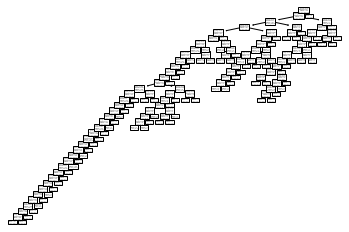

In [42]:
clf_e = tree.DecisionTreeClassifier(criterion="entropy")
clf_e = clf_e.fit(X_train, y_train)
y_pred = clf_e.predict(X_test)
tree.plot_tree(clf_e)

## Those were really hard to see so let's take the first few levels of each

## Gini pt.2

[Text(209.25, 190.26, 'X[1317] <= 0.5\ngini = 0.219\nsamples = 910\nvalue = [796, 114]'),
 Text(167.4, 135.9, 'X[1254] <= 0.5\ngini = 0.21\nsamples = 904\nvalue = [796, 108]'),
 Text(83.7, 81.53999999999999, 'X[1114] <= 0.5\ngini = 0.199\nsamples = 894\nvalue = [794, 100]'),
 Text(41.85, 27.180000000000007, 'gini = 0.189\nsamples = 887\nvalue = [793, 94]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(251.10000000000002, 81.53999999999999, 'X[1075] <= 0.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(209.25, 27.180000000000007, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

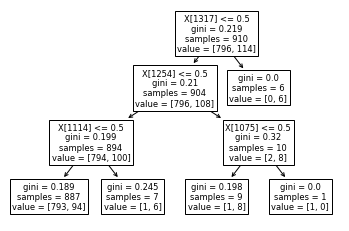

In [43]:
clf_g_cond = tree.DecisionTreeClassifier(criterion="gini", max_depth=3)
clf_g_cond = clf_g_cond.fit(X_train, y_train)
y_pred = clf_g_cond.predict(X_test)
tree.plot_tree(clf_g_cond)

## Entropy pt.2

[Text(209.25, 190.26, 'X[1317] <= 0.5\nentropy = 0.544\nsamples = 910\nvalue = [796, 114]'),
 Text(167.4, 135.9, 'X[1067] <= 0.5\nentropy = 0.528\nsamples = 904\nvalue = [796, 108]'),
 Text(83.7, 81.53999999999999, 'X[1254] <= 0.5\nentropy = 0.47\nsamples = 827\nvalue = [744, 83]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.442\nsamples = 817\nvalue = [742, 75]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.722\nsamples = 10\nvalue = [2, 8]'),
 Text(251.10000000000002, 81.53999999999999, 'X[1047] <= 0.5\nentropy = 0.909\nsamples = 77\nvalue = [52, 25]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.998\nsamples = 53\nvalue = [28, 25]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(251.10000000000002, 135.9, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]')]

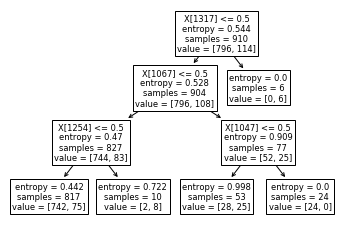

In [44]:
clf_e_cond = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_e_cond = clf_e_cond.fit(X_train, y_train)
y_pred = clf_e_cond.predict(X_test)
tree.plot_tree(clf_e_cond)